<a href="https://colab.research.google.com/github/maidyjoshi/PCVK_Ganjil_2023/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRAKTIKUM 11
## NAMA  : MAIDY PUTRI JOSHI
## NIM   : 2141720060
## KELAS : TI-3F

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, buat notebook baru dan beri nama“Week11.ipynb”.
Kemudian import beberapa library dan akses folder yang ada di Drive Anda dengan
cara sebagai berikut.

# Object Detection
Metode yang digunakan:
1. Template Matching
2. Edge Detection
3. Corner Detection
4. Grid Detection
5. Contour Detection

In [1]:
# import library
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# akses drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Implementasikan 6 metode template matching pada OpenCV dengan menggunakan
gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya

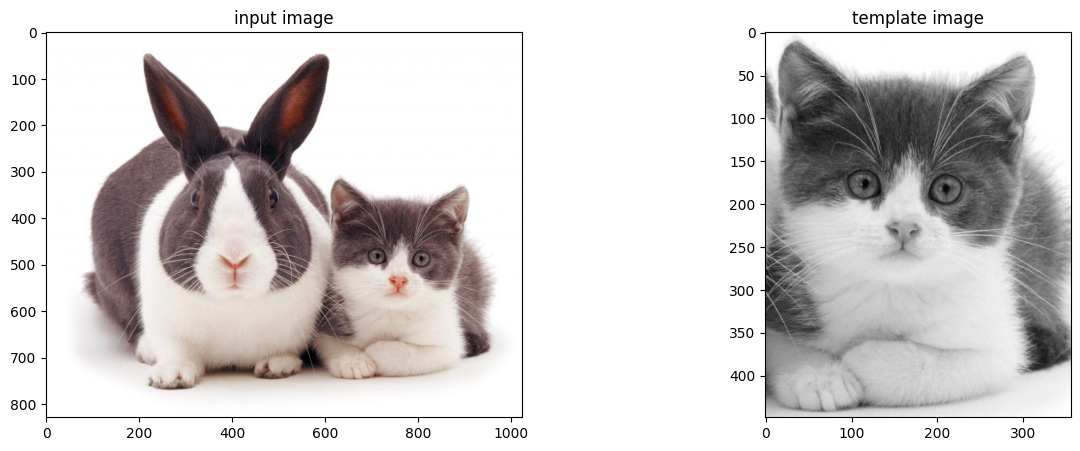

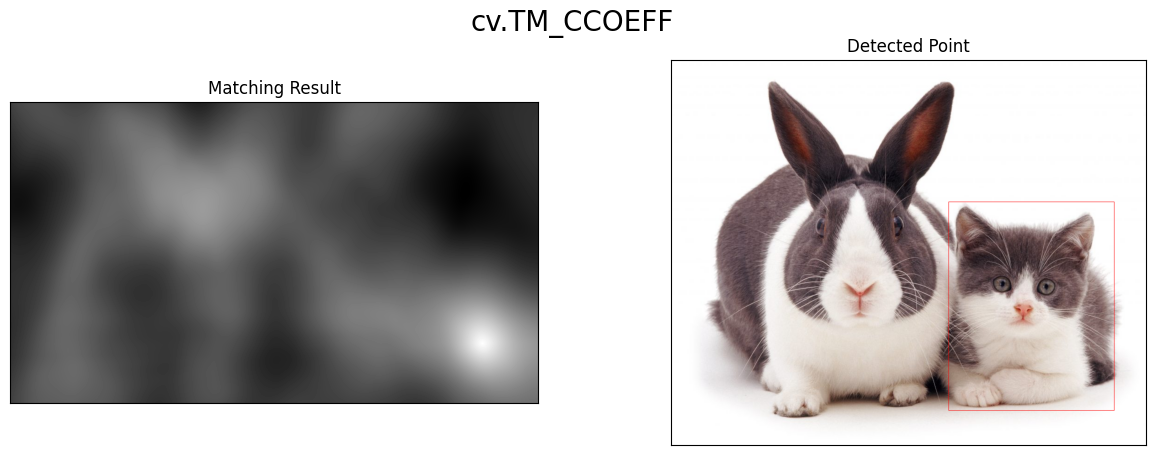

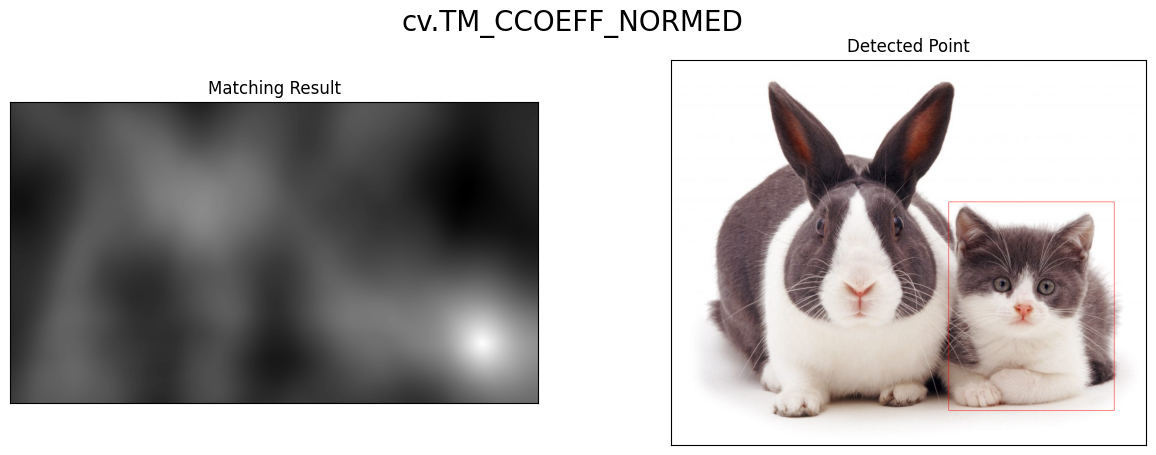

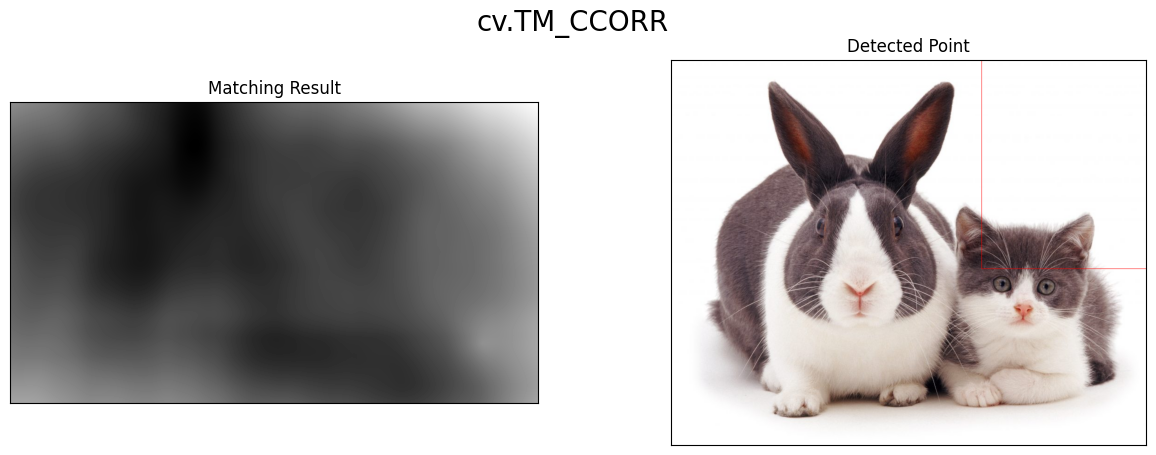

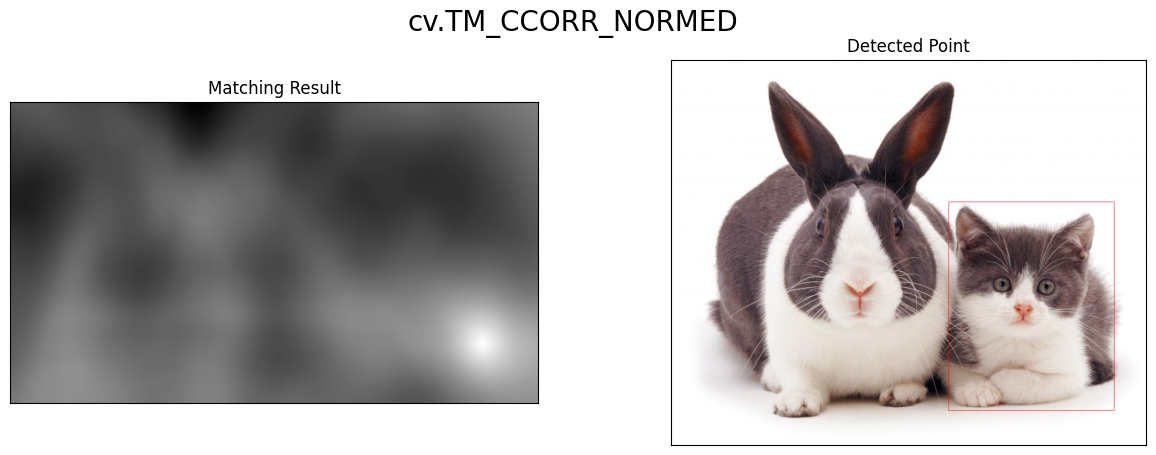

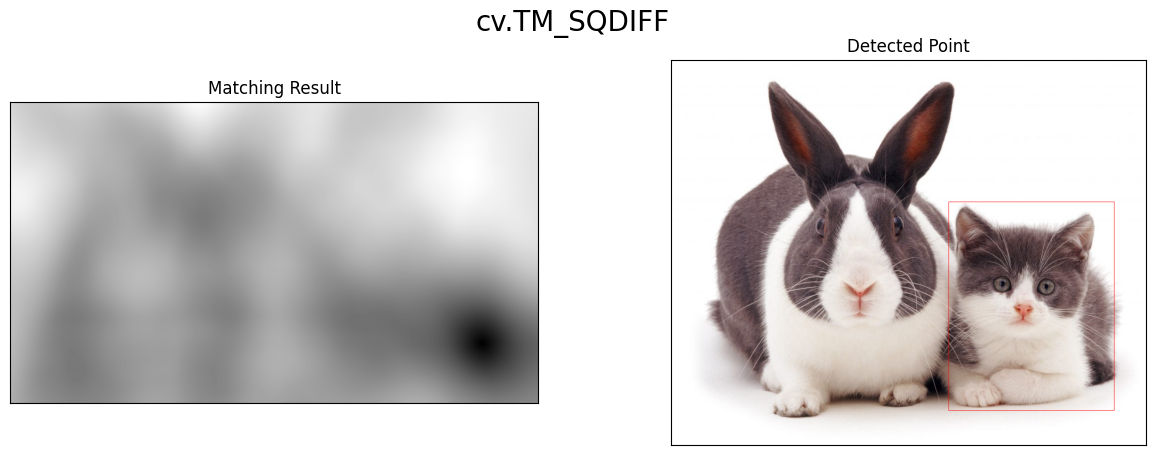

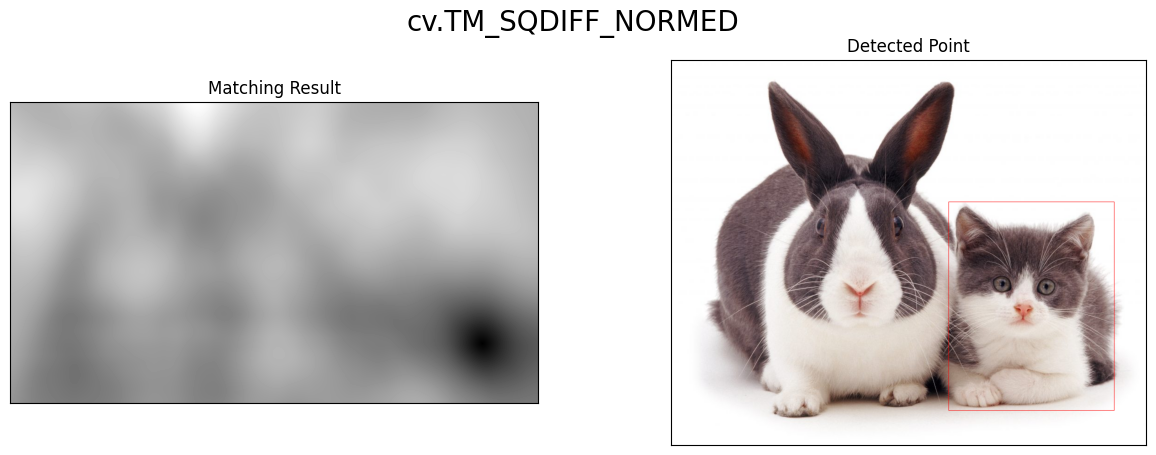

In [31]:
img = cv.imread('/content/drive/MyDrive/SEMESTER5/PCVK/Object Detection/cats_and_bunnies.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img2 = img.copy()

#load citra template
template = cv.imread('/content/drive/MyDrive/SEMESTER5/PCVK/Object Detection/cat2_templatejpg.jpg',0)
# dimensi citra
w, h = template.shape[::-1]

# print input image dan template
f, axarr = plt. subplots(1,2,figsize=(15,5)) #membuat 2 plot untuk citra input dan template
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image")
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img_gray,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img,top_left, bottom_right,(0,0,255))
    plt.figure(figsize=(15,5))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    print("\n\n")
    plt.suptitle(meth, fontsize=20)
    plt.show()

3. Implementasikan konsep template matching tanpa menggunakan library OpenCV
untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan
bahrain-template.jpg sebagai citra template, sehingga menghasilkan output sebagai
berikut:

In [32]:
from google.colab.patches import cv2_imshow

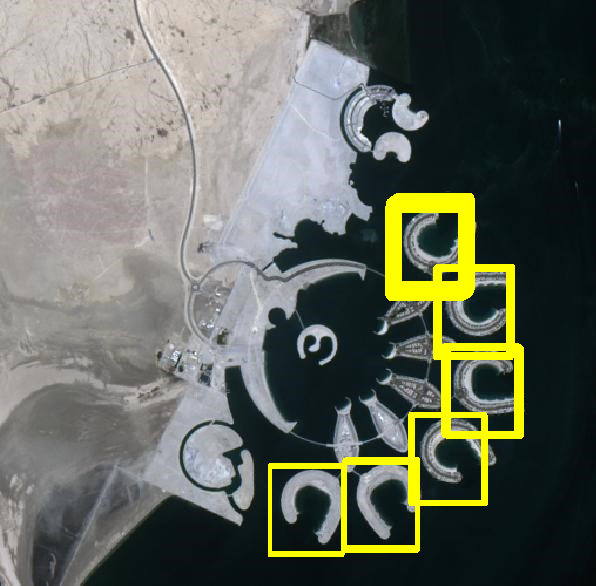

In [33]:
import cv2
import numpy as np

# Baca gambar asli dan gambar template
gambar_asli = cv2.imread('/content/drive/MyDrive/SEMESTER5/PCVK/Object Detection/bahrain.jpg',0)
template = cv2.imread('/content/drive/MyDrive/SEMESTER5/PCVK/Object Detection/bahrain-template.jpg', 0)
gambar_aslisli = cv2.imread('/content/drive/MyDrive/SEMESTER5/PCVK/Object Detection/bahrain.jpg')
# Dapatkan ukuran gambar asli dan template
tinggi, lebar = template.shape[::-1]

# Lakukan template matching dengan metode CCOEFF
result = cv2.matchTemplate(gambar_asli, template, cv2.TM_CCOEFF_NORMED)

# Dapatkan lokasi dengan nilai korelasi tertinggi
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

# Tentukan batasan threshold (misalnya, 0.8) untuk hasil yang dianggap cocok
threshold = 0.43

# Dapatkan lokasi hasil yang di atas threshold
lokasi_cocok = np.where(result >= threshold)

# Gambar kotak di sekitar area yang cocok
for pt in zip(*lokasi_cocok[::-1]):
    cv2.rectangle(gambar_aslisli, pt, (pt[0] + lebar, pt[1] + tinggi), (0, 255, 255), 1)

# Tampilkan gambar asli dengan kotak-kotak hasil yang cocok
cv2_imshow(gambar_aslisli)
cv2.waitKey(0)
cv2.destroyAllWindows()

4. Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian
Edge Detection pada OpenCV dengan menggunakan gambar car-park.jpg, sehingga menghasilkan luaran sebagai berikut:

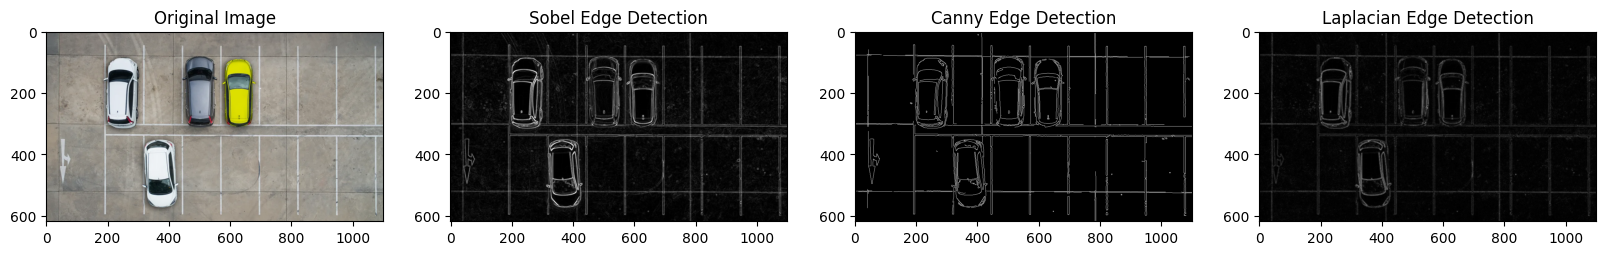

In [34]:
img0 = cv.imread('/content/drive/MyDrive/SEMESTER5/PCVK/Object Detection/car-park.jpg')
gray = cv.cvtColor(img0, cv.COLOR_BGR2GRAY)
img = cv.GaussianBlur(gray, (3, 3), 0)

img_sobelx = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)
img_sobely = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)
img_sobelxy = cv.addWeighted(cv.convertScaleAbs(img_sobelx), 0.5, cv.convertScaleAbs(img_sobely), 0.5, 0)

edges_canny = cv.Canny(img, 100, 200)

img_laplacian = cv.Laplacian(img, cv.CV_64F)
img_laplacian = cv.convertScaleAbs(img_laplacian)

f, axarr = plt.subplots(1, 4, figsize=(20, 5))

axarr[0].imshow(cv.cvtColor(img0, cv.COLOR_BGR2RGB))
axarr[0].set_title('Original Image')

axarr[1].imshow(img_sobelxy, cmap='gray')
axarr[1].set_title('Sobel Edge Detection')

axarr[2].imshow(edges_canny, cmap='gray')
axarr[2].set_title('Canny Edge Detection')

axarr[3].imshow(img_laplacian, cmap='gray')
axarr[3].set_title('Laplacian Edge Detection')

plt.show()

5. Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada
OpenCV dengan menggunakan gambar chess-board.jpg, sehingga menghasilkan luaran sebagai berikut:

a. Harris Corner Detection

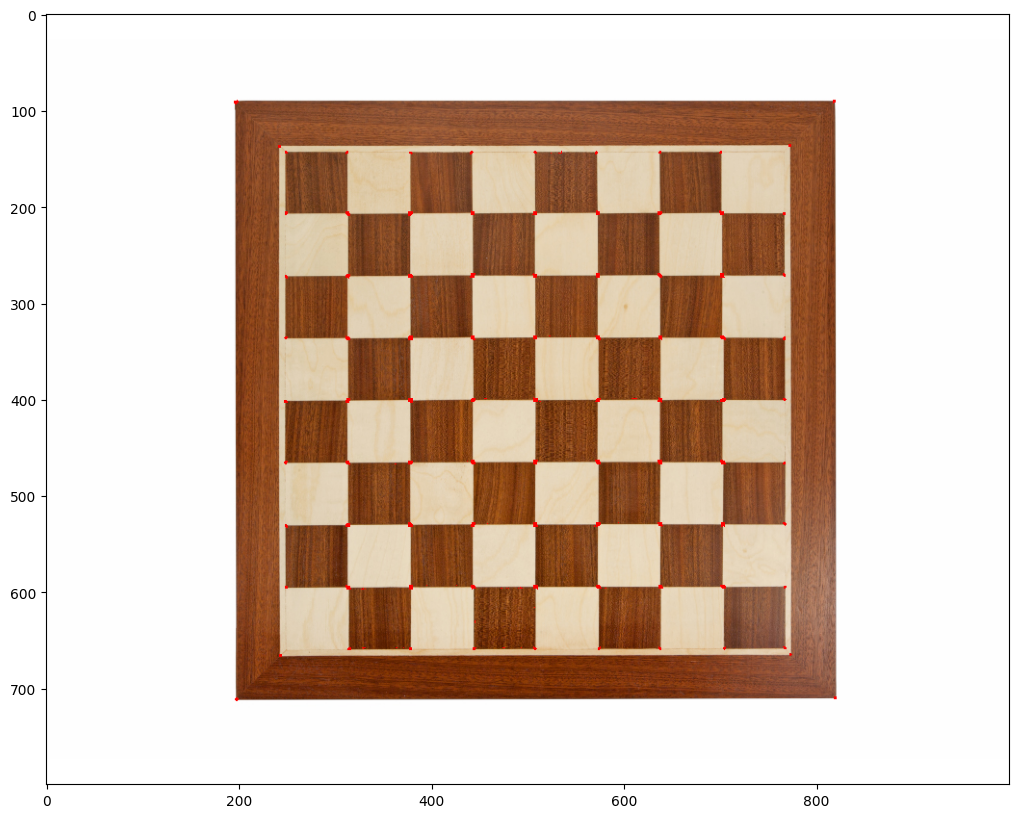

In [35]:
#Harris Corner Detection

#load citra input
input_img = cv.imread('/content/drive/MyDrive/SEMESTER5/PCVK/Object Detection/chess-board.jpg')
gray_img = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)
dst = cv.cornerHarris(gray_img,3,1,0.04)

gray_img = np.float32(gray_img)
harris_output = cv.cornerHarris(gray_img,2,3, 3)
#hasil harris corner dilakukan dilasi untuk menandai sudut
harris_output = cv.dilate(harris_output, None)

#Threshold untuk mengoptimalkan nilai
input_img[dst>0.01*dst.max()]=[0,0,255]

plt.figure(figsize=(20,10))
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

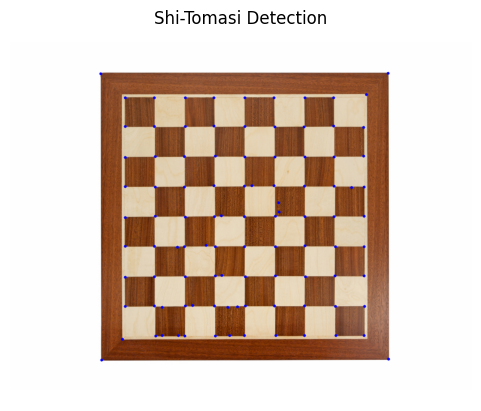

In [36]:
#shi - thomasi

# Baca gambar chess-board.jpg
img = cv.imread('/content/drive/MyDrive/SEMESTER5/PCVK/Object Detection/chess-board.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Metode Shi-Tomasi Detection
corners = cv.goodFeaturesToTrack(gray, 100, 0.01, 10)

# Konversi koordinat titik sudut ke bilangan bulat
corners = np.int0(corners)

# Gambar lingkaran pada setiap sudut yang ditemukan
for corner in corners:
    x, y = corner.ravel()
    cv.circle(img, (x, y), 3, 255, -1)

# Tampilkan hasil Shi-Tomasi Detection
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Shi-Tomasi Detection')
plt.axis('off')
plt.show()

6. Implementasikan metode Hough Transform pada OpenCV dengan menggunakan
gambar sudoku.jpg. Tahapan proses grid detection sesuai yang terdapat pada ulasan teori, sehingga menghasilkan luaran sebagai berikut:

number of Hough lines: 33
Number of filtered lines: 1
Number of filtered lines: 2
Number of filtered lines: 3
Number of filtered lines: 4
Number of filtered lines: 5
Number of filtered lines: 6
Number of filtered lines: 7
Number of filtered lines: 8
Number of filtered lines: 9
Number of filtered lines: 10
Number of filtered lines: 11
Number of filtered lines: 12
Number of filtered lines: 13
Number of filtered lines: 14
Number of filtered lines: 14
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 16
Number of filtered lines: 16
Number of filtered lines: 17
Number of filtered lines: 17
Number of filtered lines: 18
Number of filtered lines: 18
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20


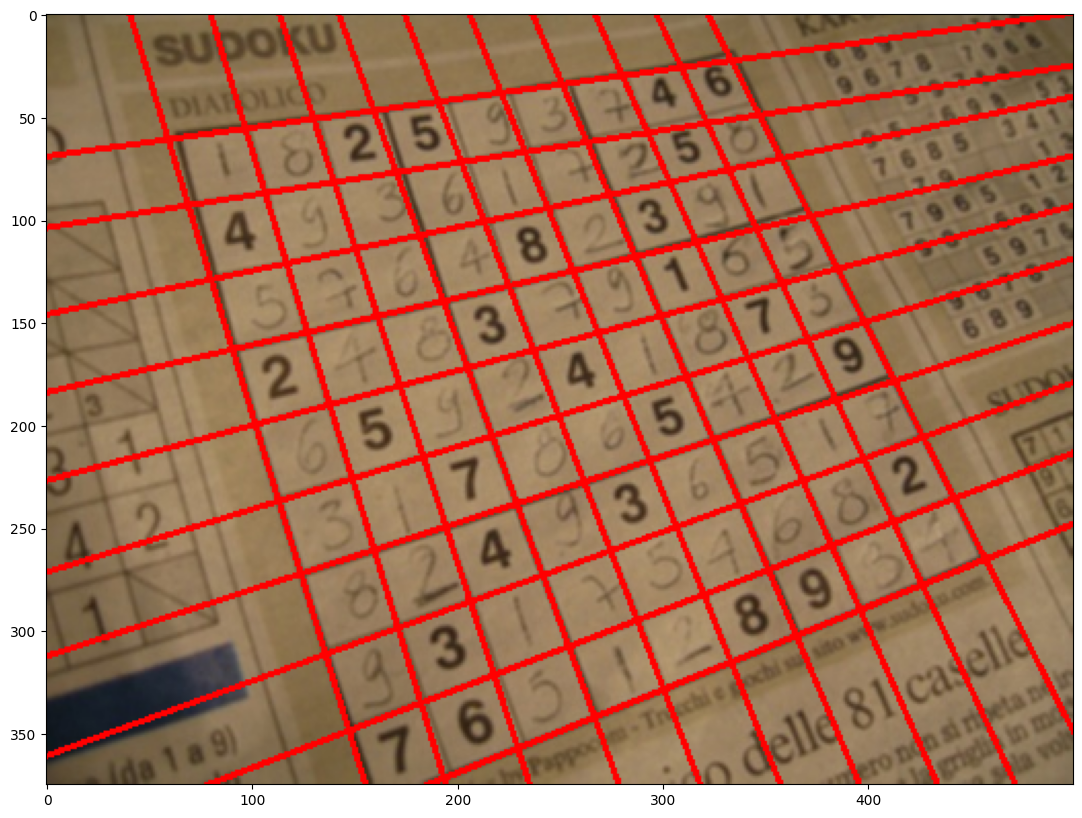

In [37]:
input_img = cv.imread('/content/drive/MyDrive/SEMESTER5/PCVK/Object Detection/sudoku.jpg')
img_gray = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

edges = cv.Canny (img_gray, 90, 150, apertureSize = 3)

kernel = np.ones((3,3), np.uint8)
edges = cv.dilate(edges,kernel,iterations = 1)

kernel = np.ones((5,5), np.uint8)
edges = cv.erode (edges, kernel, iterations = 1)

lines = cv.HoughLines(edges,1,np.pi/180,150)


if not lines.any():
    print('No lines found')
    exit()

if filter:
    rho_threshold = 15
    theta_threshold = 0.1


    similar_lines = {i : [] for i in range(len(lines))}
    for i in range(len(lines)):
      for j in range (len (lines)):
        if i == j:
            continue

        rho_i, theta_i = lines[i][0]
        rho_j, theta_j = lines[j][0]
        if abs(rho_i - rho_j) < rho_threshold and abs (theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)

    indices = [i for i in range(len(lines))]
    indices.sort(key=lambda x: len(similar_lines[x]))

    line_flags = len(lines) *[True]
    for i in range(len(lines) - 1):
        if not line_flags [indices[i]]:
            continue

        for j in range(i + 1, len(lines)):
            if not line_flags[indices[j]]:
                continue
            rho_i, theta_i = lines[indices[i]][0]
            rho_j, theta_j = lines[indices[j]][0]
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                line_flags [indices[j]] = False
    print('number of Hough lines:', len(lines))

    filtered_lines = []

    if filter:
        for i in range(len(lines)):
            if line_flags[i]:
                filtered_lines.append(lines[i])

            print('Number of filtered lines:', len(filtered_lines ))
    else:
        filtered_lines = lines

    for line in filtered_lines:
        rho, theta = line [0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv.line(input_img, (x1, y1), (x2,y2),(0,0,255),2)

    plt.figure(figsize=(20,10))
    plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

7. Implementasikan fungsi findContours() pada OpenCV untuk contour detection dengan
menggunakan gambar laptop.jpg, sehingga menghasilkan luaran sebagai berikut:

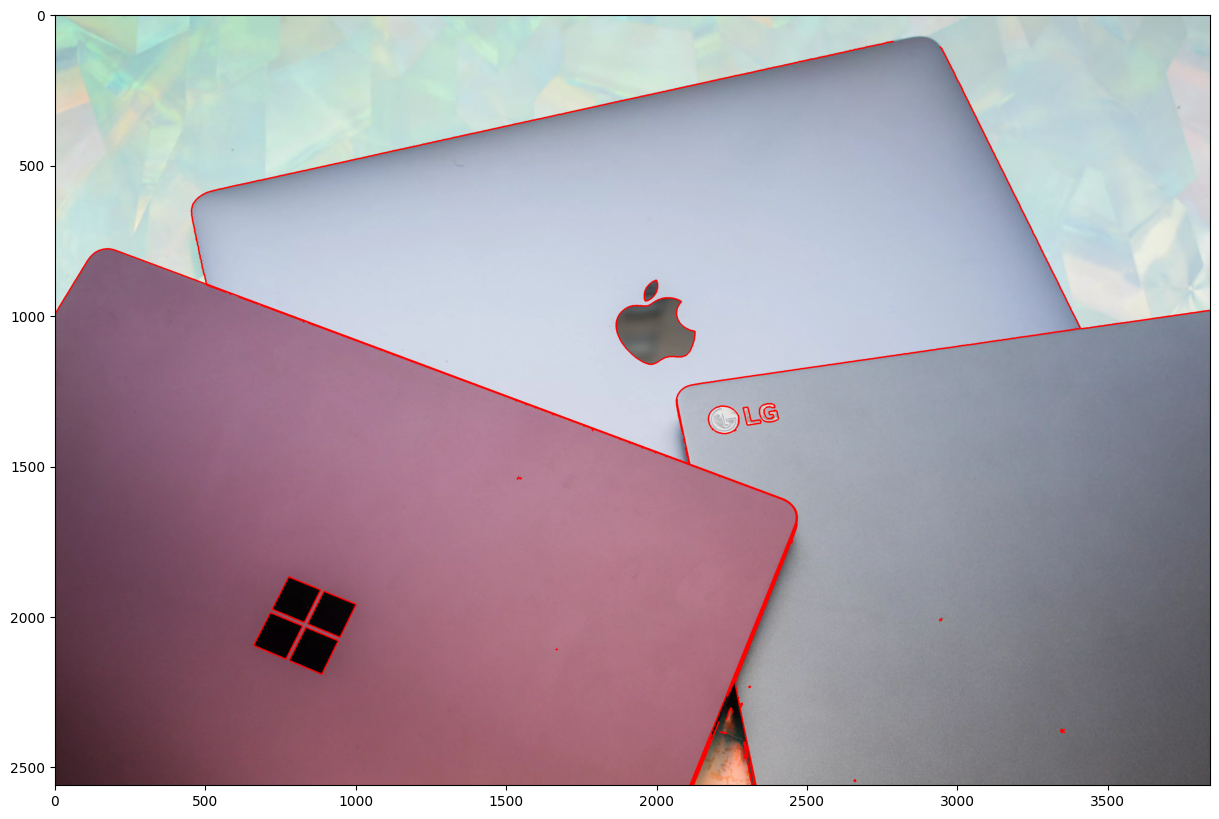

In [38]:
img = cv.imread('/content/drive/MyDrive/SEMESTER5/PCVK/Object Detection/laptop.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

edged = cv.Canny(img_gray, 30, 200)

contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

cv.drawContours(img, contours, -1, (0,0,255), 3)

plt.figure(figsize=(20,10))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

# E. PENGAYAAN MATERI KTP

1. Siapkan file dataset, contoh pada praktik ini menggunakan Maftuchin Tuban

2. Muat 2 library berikut sebagai tahapan persiapan

In [3]:
import cv2
import os

3. Tambahkan kode lokalisasi dataset dan lakukan pembacaan file name di dalam direktori
dataset tersebut
4. Masih pada looping file direktori, terapkan Gaussian Blur untuk setiap file supaya noise pickle
dapat direduksi
5. Lakukan konversi grayscale untuk setiap hasil citra yang tereduksi noise dan lanjutkan dengan
binerisasi citra (thresholding)

165.0 (300, 493)


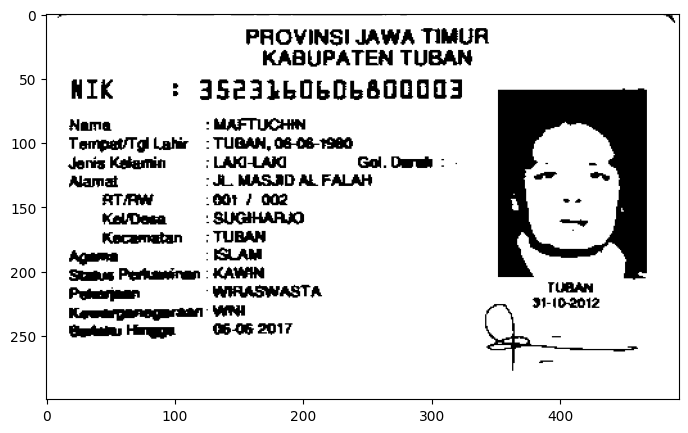

In [21]:
# lokasi dataset
path = "/content/drive/MyDrive/SEMESTER5/PCVK/ktp3.png"
src = cv2.imread(path)
blurred = src.copy()
gray =blurred.copy()

# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(ret, bw.shape)

# Tampilkan gambar hasil
f, axarr = plt.subplots(figsize=(15,5))
axarr.imshow(bw, cmap='gray')
plt.show()

6. Terapkan morfologi untuk setiap citra yang telah mengalami binerisasi supaya setiap karakter
atau obyek tidak berhimpitan

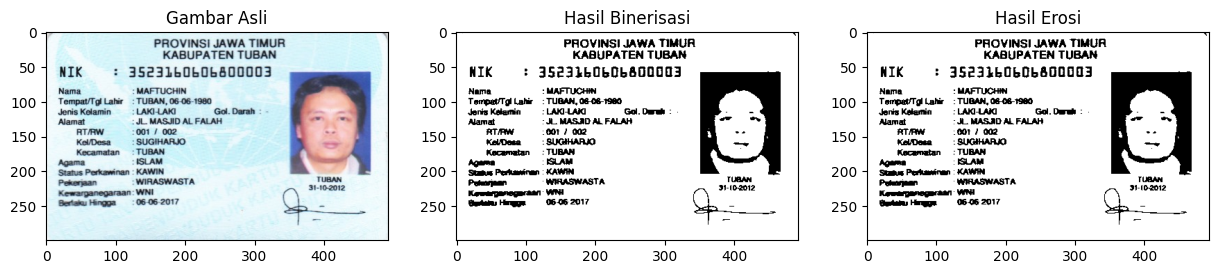

In [24]:
# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Terapkan operasi morfologi erosi
erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

# Tampilkan gambar asli, hasil binerisasi, dan hasil erosi
f, axarr = plt.subplots(1, 3, figsize=(15, 5))
axarr[0].imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
axarr[0].set_title("Gambar Asli")
axarr[1].imshow(bw, cmap='gray')
axarr[1].set_title("Hasil Binerisasi")
axarr[2].imshow(erode, cmap='gray')
axarr[2].set_title("Hasil Erosi")
plt.show()

165.0 (300, 493)


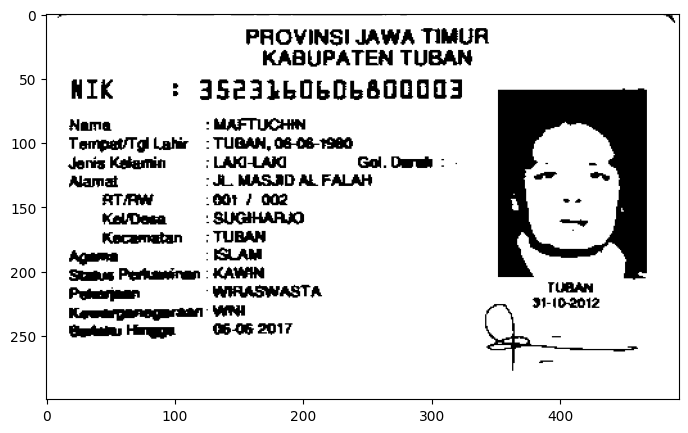

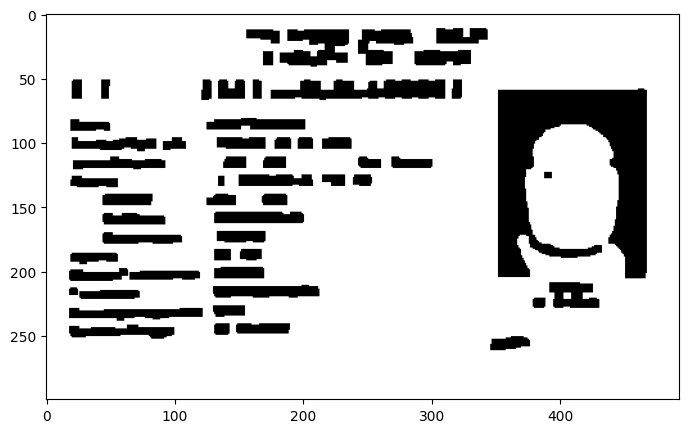

In [25]:
import cv2
import matplotlib.pyplot as plt

# lokasi dataset
path = "/content/drive/MyDrive/SEMESTER5/PCVK/ktp3.png"
src = cv2.imread(path)
blurred = src.copy()
gray =blurred.copy()

# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(ret, bw.shape)

# Tampilkan gambar hasil
f, axarr = plt.subplots(figsize=(15,5))
axarr.imshow(bw, cmap='gray')
plt.show()

# Operasi morfologi
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))  # Menggunakan kernel berbentuk persegi 5x5
morph = cv2.morphologyEx(bw, cv2.MORPH_OPEN, kernel)
morph = cv2.morphologyEx(morph, cv2.MORPH_CLOSE, kernel)

# Tampilkan hasil operasi morfologi
f, axarr = plt.subplots(figsize=(15,5))
axarr.imshow(morph, cmap='gray')
plt.show()


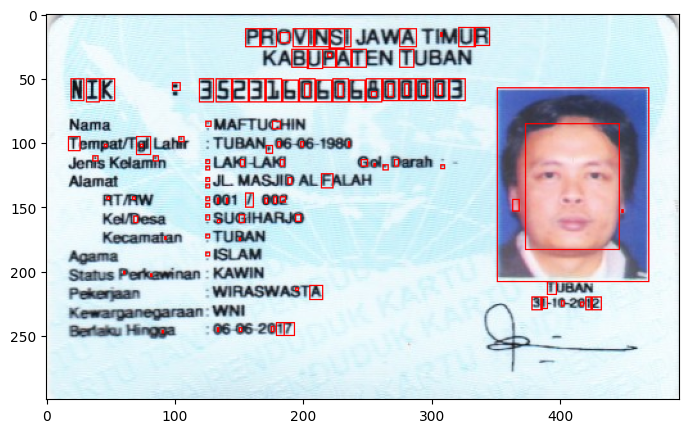

In [26]:
blurred = cv.GaussianBlur(src, (5, 5), 0.5)

gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 4 and w >= 1 and float(ras) <= 1:
      cv.rectangle(src, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 2 and w >= 1 and float(ras) <= 1:
      cv.rectangle(src, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

plt.figure(figsize=(10,5))
plt.imshow(cv.cvtColor(src, cv.COLOR_BGR2RGB))

**Tugas Praktikum Kelompok (3):**
1. Dhoriffito Diansyah Putra (2141720201/11)
2. Josafat Pratama Susilo (2141720031/15)
3. Maidy Putri Joshi (2141720060/18)
4. Nasyawa Ramadhia K.S.E (2141720011/22)
5. Novita Dwi Rahmadani (2141720050/23)
- KTP Arief Wijaya Cimahi


In [27]:
# import
import cv2
import os

151.0 (707, 1070)


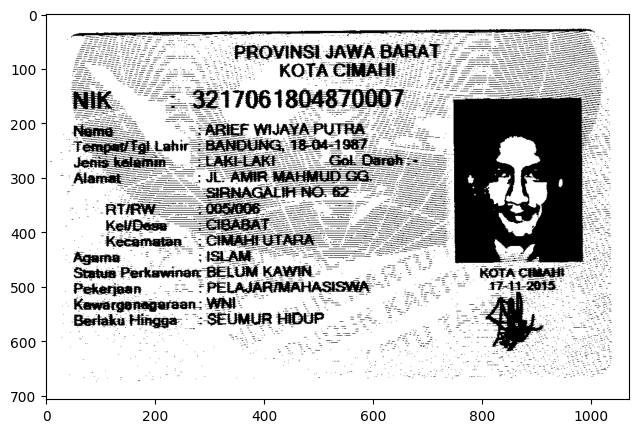

In [39]:
# lokasi dataset
path = "/content/drive/MyDrive/SEMESTER5/PCVK/ktp2.png"
src = cv2.imread(path)
blurred = src.copy()
gray =blurred.copy()

# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(ret, bw.shape)

# Tampilkan gambar hasil
f, axarr = plt.subplots(figsize=(15,5))
axarr.imshow(bw, cmap='gray')
plt.show()

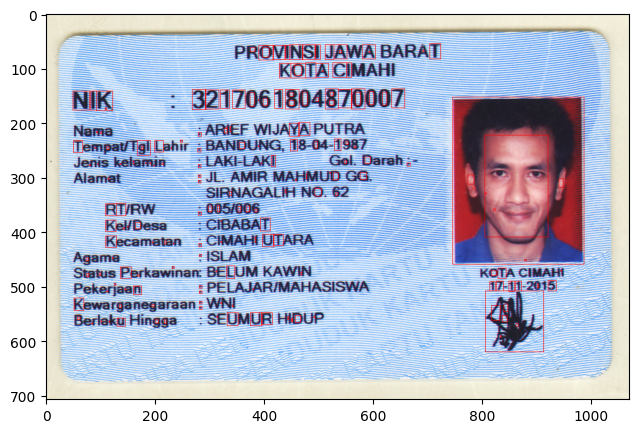

In [40]:
blurred = cv.GaussianBlur(src, (5, 5), 0)

gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 4 and w >= 1 and float(ras) <= 1:
      cv.rectangle(src, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 2 and w >= 1 and float(ras) <= 1:
      cv.rectangle(src, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

plt.figure(figsize=(10,5))
plt.imshow(cv.cvtColor(src, cv.COLOR_BGR2RGB))